In [1]:
# import EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/tmp/ipykernel_6024/3862321475.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Set the dark grid theme for Seaborn plots
sns.set_theme(style="darkgrid")

In [3]:
# load the dataset
df = pd.read_csv('customer_orders_copy_2.csv')

In [4]:
# Make a copy of the dataset
df_copy = df.copy()

In [5]:
# Display the first 5 rows of the dataset
print(df_copy.head())

  Customer Name Total Spent  Total Orders Average Purchase  \
0  Customer6513   $2,995.82            64           $46.81   
1  Customer9114   $2,902.17            21          $138.20   
2  Customer6041   $2,041.59           170           $12.01   
3  Customer1124     $619.83            38           $16.31   
4  Customer3261     $108.96             2           $54.48   

  Average Monthly Spend  Average Monthly Orders  Last Ordered Customer Since  \
0                $65.13                       1  Jun 08, 2023   Apr 06, 2020   
1                $54.76                       0  May 19, 2023   Sep 03, 2019   
2                $22.44                       1  Dec 08, 2021   Jun 22, 2016   
3                $13.77                       0  Dec 23, 2023   May 01, 2020   
4                 $9.91                       0  Mar 02, 2023   Mar 06, 2021   

    Customer Lifetime  
0   3 yrs 9 mos 9 dys  
1  4 yrs 4 mos 11 dys  
2  7 yrs 6 mos 23 dys  
3  3 yrs 8 mos 13 dys  
4       10 mos 24 dys  


In [6]:
# # Drop Email column
# df_copy = df_copy.drop('Email', axis=1)

In [7]:
# Display the first 5 rows of the dataset
print(df_copy.head())

  Customer Name Total Spent  Total Orders Average Purchase  \
0  Customer6513   $2,995.82            64           $46.81   
1  Customer9114   $2,902.17            21          $138.20   
2  Customer6041   $2,041.59           170           $12.01   
3  Customer1124     $619.83            38           $16.31   
4  Customer3261     $108.96             2           $54.48   

  Average Monthly Spend  Average Monthly Orders  Last Ordered Customer Since  \
0                $65.13                       1  Jun 08, 2023   Apr 06, 2020   
1                $54.76                       0  May 19, 2023   Sep 03, 2019   
2                $22.44                       1  Dec 08, 2021   Jun 22, 2016   
3                $13.77                       0  Dec 23, 2023   May 01, 2020   
4                 $9.91                       0  Mar 02, 2023   Mar 06, 2021   

    Customer Lifetime  
0   3 yrs 9 mos 9 dys  
1  4 yrs 4 mos 11 dys  
2  7 yrs 6 mos 23 dys  
3  3 yrs 8 mos 13 dys  
4       10 mos 24 dys  


In [8]:
# Clean up column names
df_copy.columns = df_copy.columns.str.replace(' ', '_').str.lower()
print(df_copy.columns)

Index(['customer_name', 'total_spent', 'total_orders', 'average_purchase',
       'average_monthly_spend', 'average_monthly_orders', 'last_ordered',
       'customer_since', 'customer_lifetime'],
      dtype='object')


In [9]:
# List of numeric columns containing monetary values
numeric_columns = ['total_spent', 'total_orders', 'average_purchase', 
                   'average_monthly_spend', 'average_monthly_orders']

# Iterate over each numeric column
for col in numeric_columns:
    # Remove commas and the dollar sign ($) and convert to float
    df_copy[col] = df_copy[col].replace(r'[\$,]', '', regex=True).astype(float)

# Display the first 5 rows of the dataset
print(df_copy.head())


  customer_name  total_spent  total_orders  average_purchase  \
0  Customer6513      2995.82          64.0             46.81   
1  Customer9114      2902.17          21.0            138.20   
2  Customer6041      2041.59         170.0             12.01   
3  Customer1124       619.83          38.0             16.31   
4  Customer3261       108.96           2.0             54.48   

   average_monthly_spend  average_monthly_orders  last_ordered customer_since  \
0                  65.13                     1.0  Jun 08, 2023   Apr 06, 2020   
1                  54.76                     0.0  May 19, 2023   Sep 03, 2019   
2                  22.44                     1.0  Dec 08, 2021   Jun 22, 2016   
3                  13.77                     0.0  Dec 23, 2023   May 01, 2020   
4                   9.91                     0.0  Mar 02, 2023   Mar 06, 2021   

    customer_lifetime  
0   3 yrs 9 mos 9 dys  
1  4 yrs 4 mos 11 dys  
2  7 yrs 6 mos 23 dys  
3  3 yrs 8 mos 13 dys  
4       

In [10]:
# Convert both date columns to datetime
df_copy['customer_since'] = pd.to_datetime(df_copy['customer_since'])
df_copy['last_ordered'] = pd.to_datetime(df_copy['last_ordered'])

# Display the first 5 rows of the dataset
print(df_copy.head())

  customer_name  total_spent  total_orders  average_purchase  \
0  Customer6513      2995.82          64.0             46.81   
1  Customer9114      2902.17          21.0            138.20   
2  Customer6041      2041.59         170.0             12.01   
3  Customer1124       619.83          38.0             16.31   
4  Customer3261       108.96           2.0             54.48   

   average_monthly_spend  average_monthly_orders last_ordered customer_since  \
0                  65.13                     1.0   2023-06-08     2020-04-06   
1                  54.76                     0.0   2023-05-19     2019-09-03   
2                  22.44                     1.0   2021-12-08     2016-06-22   
3                  13.77                     0.0   2023-12-23     2020-05-01   
4                   9.91                     0.0   2023-03-02     2021-03-06   

    customer_lifetime  
0   3 yrs 9 mos 9 dys  
1  4 yrs 4 mos 11 dys  
2  7 yrs 6 mos 23 dys  
3  3 yrs 8 mos 13 dys  
4       10 mos

In [11]:
# Check for missing values
print(df_copy.isnull().sum())

customer_name             0
total_spent               0
total_orders              0
average_purchase          0
average_monthly_spend     0
average_monthly_orders    0
last_ordered              0
customer_since            0
customer_lifetime         0
dtype: int64


In [12]:
# Calculate customer tenure (the time between customer_since and last_ordered)
df_copy['customer_tenure'] = df_copy['last_ordered'] - df_copy['customer_since']

# Calculate recency (time since the last order)
today = pd.to_datetime('today')
df_copy['recency'] = today - df_copy['last_ordered']

# Display the first few rows to verify
print(df_copy[['customer_tenure', 'recency']].head())

  customer_tenure                  recency
0       1158 days 318 days 13:43:49.387193
1       1354 days 338 days 13:43:49.387193
2       1995 days 865 days 13:43:49.387193
3       1331 days 120 days 13:43:49.387193
4        726 days 416 days 13:43:49.387193


In [13]:
# Display first 5 rows of the dataset
print(df_copy.head())

  customer_name  total_spent  total_orders  average_purchase  \
0  Customer6513      2995.82          64.0             46.81   
1  Customer9114      2902.17          21.0            138.20   
2  Customer6041      2041.59         170.0             12.01   
3  Customer1124       619.83          38.0             16.31   
4  Customer3261       108.96           2.0             54.48   

   average_monthly_spend  average_monthly_orders last_ordered customer_since  \
0                  65.13                     1.0   2023-06-08     2020-04-06   
1                  54.76                     0.0   2023-05-19     2019-09-03   
2                  22.44                     1.0   2021-12-08     2016-06-22   
3                  13.77                     0.0   2023-12-23     2020-05-01   
4                   9.91                     0.0   2023-03-02     2021-03-06   

    customer_lifetime customer_tenure                  recency  
0   3 yrs 9 mos 9 dys       1158 days 318 days 13:43:49.387193  
1  4

In [14]:
# Calculate historical CLV
historical_clv = df_copy.groupby('customer_name')['total_spent'].sum()

# Display the historical CLV for each customer
print(historical_clv)

customer_name
Customer1000    711.21
Customer1001     76.59
Customer1006     85.27
Customer1008    225.48
Customer1012    125.94
                 ...  
Customer9985     33.24
Customer9987     10.80
Customer9990     55.02
Customer9994    338.25
Customer9998     74.15
Name: total_spent, Length: 3849, dtype: float64


In [15]:
# Display summary statistics of the entire dataset
print(df_copy.describe())

       total_spent  total_orders  average_purchase  average_monthly_spend  \
count  5025.000000   5025.000000       5025.000000            5025.000000   
mean     91.954762      3.324577         34.852736               4.664764   
min       4.450000      1.000000          4.450000               0.050000   
25%      19.800000      1.000000         14.470000               0.590000   
50%      35.510000      1.000000         22.950000               1.490000   
75%      88.060000      2.000000         38.450000               4.140000   
max    2995.820000    220.000000        911.020000             529.280000   
std     192.981239      8.339908         41.090587              13.412739   

       average_monthly_orders                   last_ordered  \
count             5025.000000                           5025   
mean                 0.034030  2021-07-18 13:33:51.044776192   
min                  0.000000            2014-12-16 00:00:00   
25%                  0.000000            2020-06-2

In [16]:
# Print shape of the dataset
print(df_copy.shape)

(5025, 11)


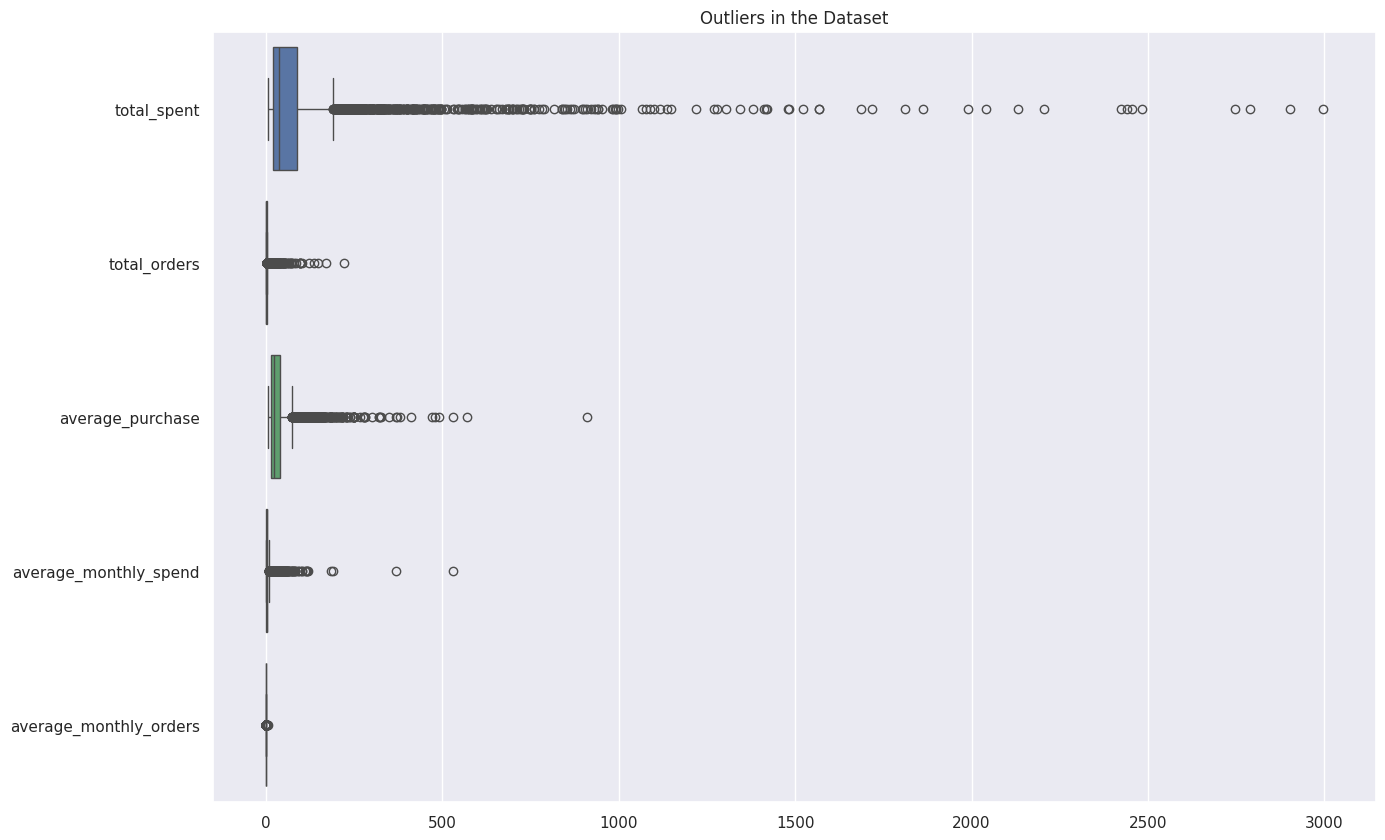

   total_spent  total_orders  average_purchase  average_monthly_spend  \
0    15.047397      7.275311          0.290998               4.508045   
1    14.562116      2.119379          2.515108               3.734900   
2    10.102719     19.985283         -0.555912               1.325250   
3     2.735371      4.157770         -0.451265               0.678850   
4     0.088119     -0.158824          0.477658               0.391064   

   average_monthly_orders  
0                4.445787  
1               -0.156619  
2                4.445787  
3               -0.156619  
4               -0.156619  
   customer_name  total_spent  total_orders  average_purchase  \
0   Customer6513      2995.82          64.0             46.81   
1   Customer9114      2902.17          21.0            138.20   
2   Customer6041      2041.59         170.0             12.01   
3   Customer1124       619.83          38.0             16.31   
14  Customer4712       618.27          96.0              6.44   

  

In [17]:
# check each numerical feature for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_copy, orient='h')
plt.title('Outliers in the Dataset')
plt.show()

# Calculate the z-scores of each feature
z_scores = (df_copy[numeric_columns] - df_copy[numeric_columns].mean()) / df_copy[numeric_columns].std()

# Display the first few rows of the z-scores
print(z_scores.head())

# Find the number of rows where the z-scores are greater than 3 or less than -3
outliers = df_copy[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Display the first few rows of the dataset
print(outliers.head())

In [18]:
# Identify the top 50 customers by lifetime value
top_50_customers = historical_clv.sort_values(ascending=False).head(50)

# Display the top 50 customers by lifetime value
print(top_50_customers)

customer_name
Customer6513    3003.33
Customer9114    2902.17
Customer5167    2834.45
Customer9866    2788.12
Customer5518    2521.73
Customer1833    2455.11
Customer7031    2449.13
Customer2986    2440.77
Customer1882    2206.26
Customer6477    2146.90
Customer6041    2138.20
Customer4321    2066.78
Customer8033    2014.33
Customer8199    1811.06
Customer7956    1750.12
Customer4107    1717.25
Customer3691    1613.04
Customer6946    1567.09
Customer8911    1522.04
Customer1274    1506.42
Customer4672    1489.70
Customer2149    1478.60
Customer3326    1427.91
Customer2421    1420.15
Customer7814    1417.01
Customer2741    1410.79
Customer7504    1392.70
Customer2945    1303.36
Customer8314    1277.15
Customer8846    1270.74
Customer7009    1258.40
Customer5199    1219.31
Customer8534    1157.20
Customer2902    1149.92
Customer9548    1137.12
Customer2613    1116.21
Customer6337    1116.00
Customer2072    1088.02
Customer2472    1085.94
Customer5442    1084.30
Customer7905    1079.95
Cu

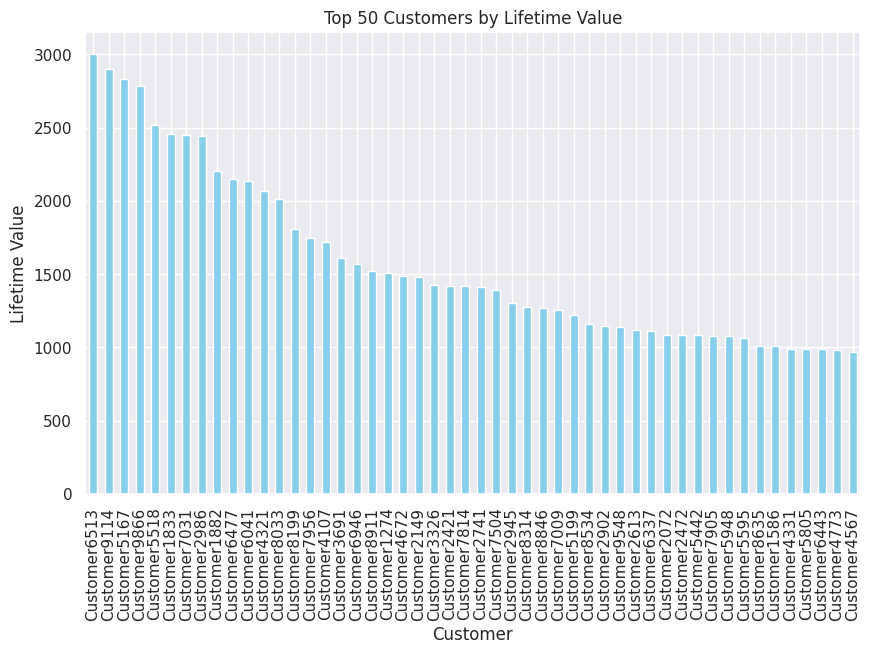

In [19]:
# Plot the top 50 customers by lifetime value
plt.figure(figsize=(10, 6))
top_50_customers.plot(kind='bar', color='skyblue')
plt.title('Top 50 Customers by Lifetime Value')
plt.ylabel('Lifetime Value')
plt.xlabel('Customer')
plt.show()

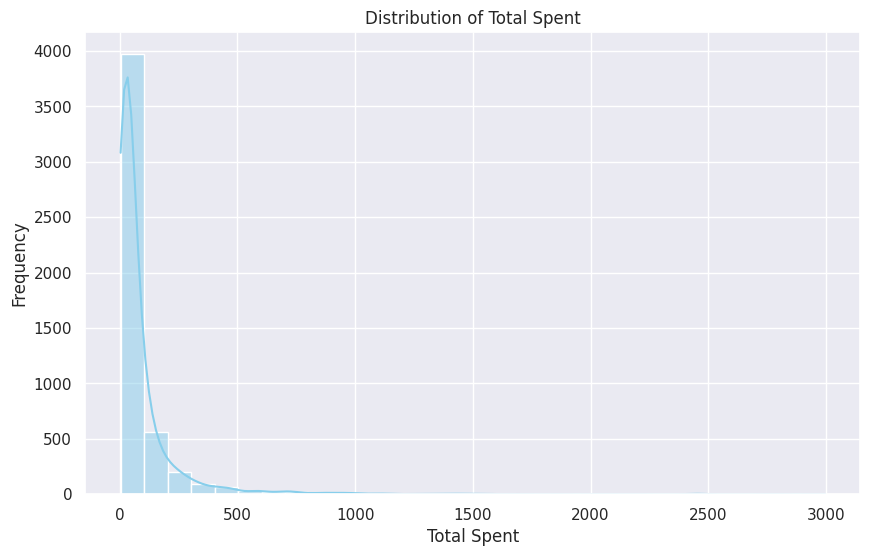

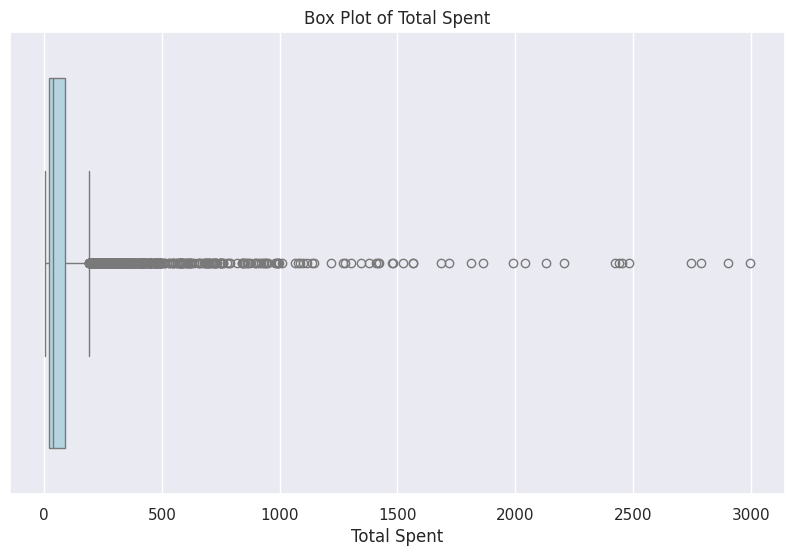

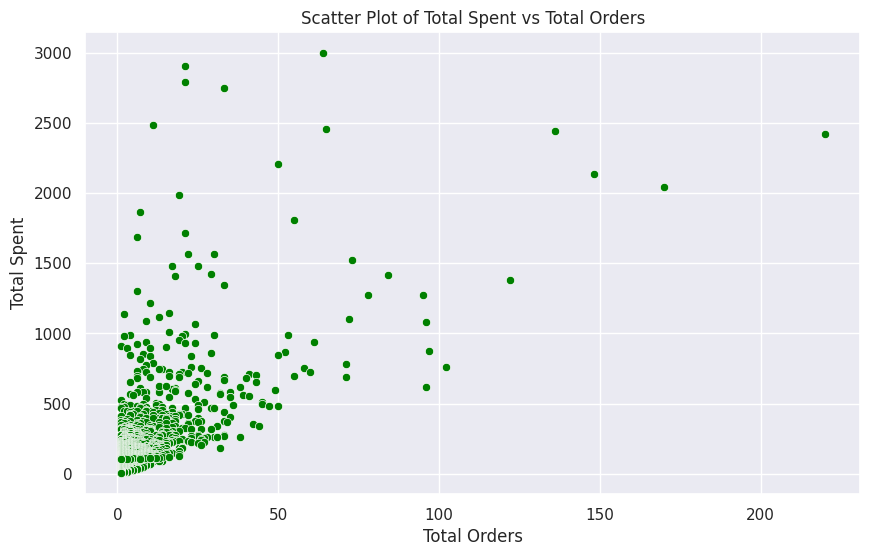

In [20]:
# Set the style for seaborn to darkgrid
sns.set_style("darkgrid")

# Histogram of total_spent
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['total_spent'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

# Box plot of total_spent
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy['total_spent'], color='lightblue')
plt.title('Box Plot of Total Spent')
plt.xlabel('Total Spent')
plt.show()

# Scatter plot of total_spent vs total_orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_orders', y='total_spent', data=df_copy, color='green')
plt.title('Scatter Plot of Total Spent vs Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Total Spent')
plt.show()

                        total_spent  total_orders  average_purchase  \
total_spent                1.000000      0.691868          0.325042   
total_orders               0.691868      1.000000         -0.069798   
average_purchase           0.325042     -0.069798          1.000000   
average_monthly_spend      0.441188      0.202959          0.441115   
average_monthly_orders     0.320814      0.512255         -0.014493   

                        average_monthly_spend  average_monthly_orders  
total_spent                          0.441188                0.320814  
total_orders                         0.202959                0.512255  
average_purchase                     0.441115               -0.014493  
average_monthly_spend                1.000000                0.418209  
average_monthly_orders               0.418209                1.000000  


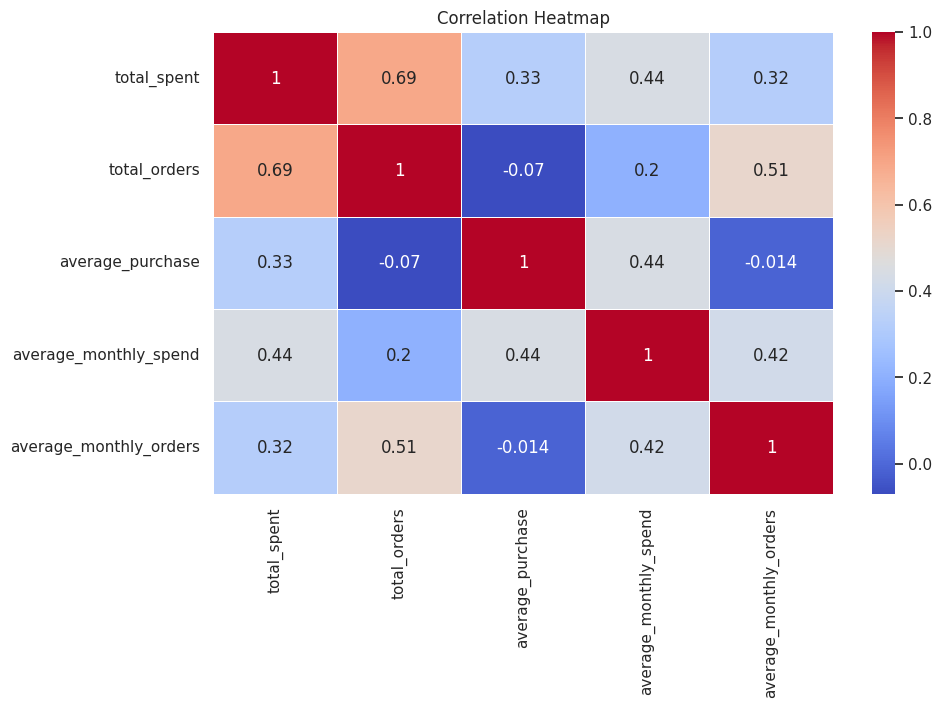

In [21]:
# Exclude non-numeric columns before correlation analysis
numeric_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns
correlation = df_copy[numeric_columns].corr()

# Display the correlation matrix
print(correlation)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Total Spent vs. Total Orders: There is a strong positive correlation (0.691868) between the total amount spent by customers and the total number of orders they've made. This suggests that customers who spend more tend to place more orders, which is intuitive.

Total Spent vs. Average Purchase: There is a moderate positive correlation (0.325042) between the total amount spent and the average purchase amount. This indicates that customers who spend more tend to have higher average purchase amounts.

Total Spent vs. Average Monthly Spend: There is a moderate positive correlation (0.441188) between the total amount spent and the average monthly spend. This suggests that customers who have spent more in total also tend to have higher average monthly spending.

Total Orders vs. Average Monthly Orders: There is a moderate positive correlation (0.512255) between the total number of orders and the average monthly number of orders. This indicates that customers who place more orders in total also tend to place more orders on average per month.

In [22]:
df_copy['recency'].dt.days.describe()

count    5025.000000
mean     1007.434826
std       777.019931
min        93.000000
25%       359.000000
50%       823.000000
75%      1398.000000
max      3414.000000
Name: recency, dtype: float64

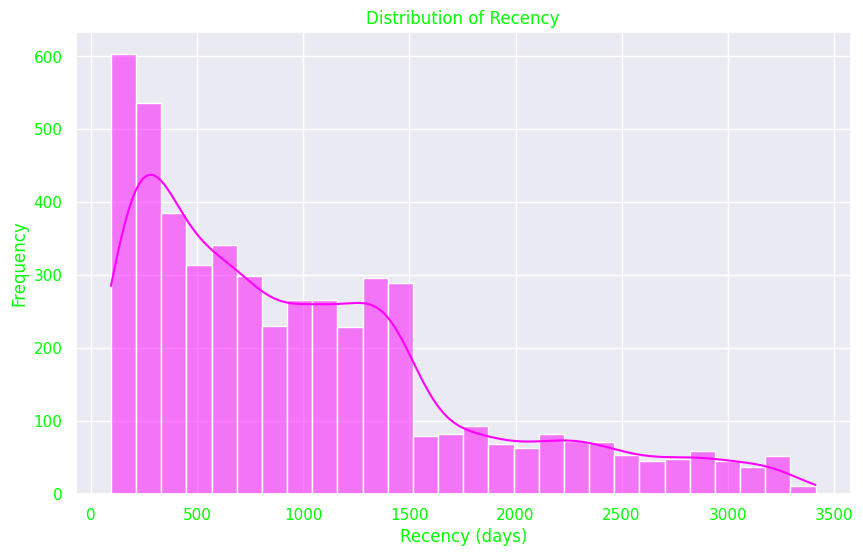

In [23]:
# Set the dark grid theme for Seaborn plots
sns.set_theme(style="darkgrid")

# Create the histogram plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_copy, x=df_copy['recency'].dt.days, kde=True, color='magenta')

# Set the title, x-label, and y-label with neon colors
plt.title('Distribution of Recency', color='lime')
plt.xlabel('Recency (days)', color='lime')
plt.ylabel('Frequency', color='lime')

# Customize ticks color
plt.xticks(color='lime')
plt.yticks(color='lime')

# Show the plot
plt.show()

In [24]:
# Convert recency to number of days
df_copy['recency_days'] = df_copy['recency'].dt.days

# Filter customers who haven't ordered in the last 365 days
inactive_customers = df_copy[df_copy['recency_days'] > 365]

# Display the inactive customers
print(inactive_customers)

     customer_name  total_spent  total_orders  average_purchase  \
2     Customer6041      2041.59         170.0             12.01   
4     Customer3261       108.96           2.0             54.48   
5     Customer5155       108.92           3.0             36.31   
7     Customer8684       108.69           6.0             18.12   
9     Customer7335       108.37           2.0             54.19   
...            ...          ...           ...               ...   
5020  Customer9679       109.46           1.0            109.46   
5021  Customer4498       109.32           7.0             15.62   
5022  Customer5811       109.12           3.0             36.37   
5023  Customer1402       109.01           1.0            109.01   
5024  Customer3130       108.97           1.0            108.97   

      average_monthly_spend  average_monthly_orders last_ordered  \
2                     22.44                     1.0   2021-12-08   
4                      9.91                     0.0   2023-

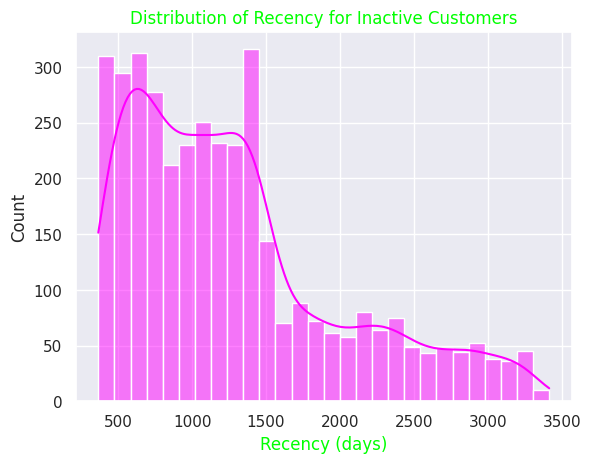

In [25]:
# Plot a histogram of the recency of inactive customers
sns.histplot(data=inactive_customers, x="recency_days", kde=True, color='magenta')
plt.xlabel('Recency (days)', color='lime')
plt.title('Distribution of Recency for Inactive Customers', color='lime')
plt.show()

/tmp/ipykernel_6024/1492535118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_customers['recency_years'] = inactive_customers['recency_days'] // 365


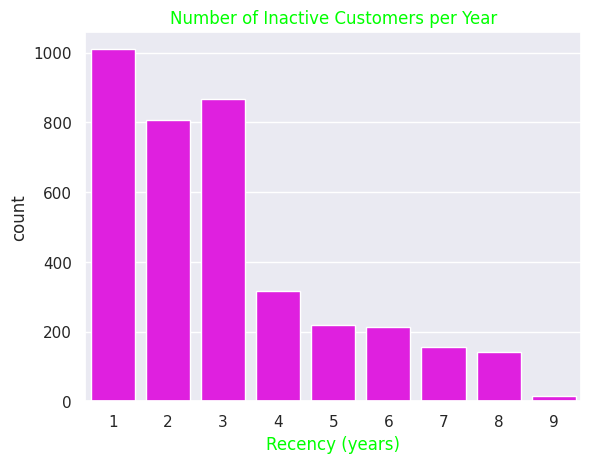

In [26]:
# Calculate the number of years of inactivity
inactive_customers['recency_years'] = inactive_customers['recency_days'] // 365

# Plot a bar plot of the number of inactive customers per year
sns.countplot(data=inactive_customers, x="recency_years", color='magenta')
plt.xlabel('Recency (years)', color='lime')
plt.title('Number of Inactive Customers per Year', color='lime')
plt.show()

In [27]:
# Define churned customers as those who haven't ordered in the last 365 days
churned_customers = df_copy[df_copy['recency_days'] > 365]

# Calculate churn rate
churn_rate = len(churned_customers) / len(df_copy)

print(f"The customer churn rate is: {churn_rate * 100:.2f}%")

The customer churn rate is: 74.51%


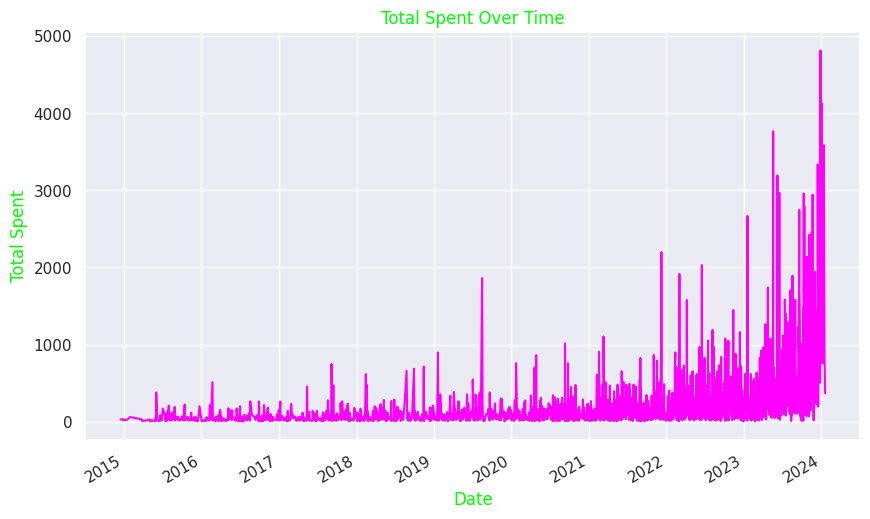

In [28]:
# Ensure your date column is in datetime format
df_copy['last_ordered'] = pd.to_datetime(df_copy['last_ordered'])

# Sort the data by date
df_sorted = df_copy.sort_values('last_ordered')

# Group by date and calculate total spent
total_spent_per_date = df_sorted.groupby('last_ordered')['total_spent'].sum()

# Plot the total spent over time
plt.figure(figsize=(10,6))
total_spent_per_date.plot(kind='line', color='magenta')
plt.title('Total Spent Over Time', color='lime')
plt.xlabel('Date', color='lime')
plt.ylabel('Total Spent', color='lime')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Select columns
df_cluster = df_copy[['total_spent', 'total_orders', 'recency_days']]

# Scale the data
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

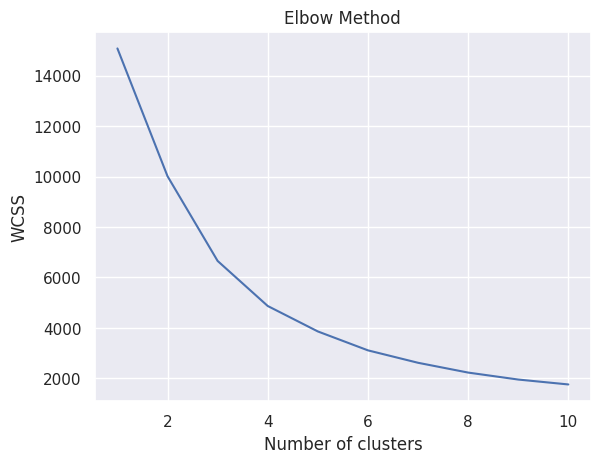

In [30]:
from sklearn.cluster import KMeans

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# Convert timedelta to a number of days
df_copy['customer_tenure_days'] = df_copy['customer_tenure'].dt.days

# Build the model with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_cluster_scaled)

# Assign the cluster labels back to the original DataFrame
df_copy['cluster_label'] = cluster_labels

# Select only numeric columns
numeric_cols = df_copy.select_dtypes(include=[np.number])

# Group by cluster label and calculate average values of numeric columns
df_clusters = numeric_cols.groupby(df_copy['cluster_label']).mean()

# Display the clusters
print(df_clusters)

               total_spent  total_orders  average_purchase  \
cluster_label                                                
0                65.314151      2.282772         34.078911   
1                45.828197      1.544279         33.564764   
2              1725.346400     84.480000         38.451200   
3               557.334378     19.642570         52.450602   

               average_monthly_spend  average_monthly_orders  \
cluster_label                                                  
0                           5.079825                0.030899   
1                           0.747072                0.000000   
2                          38.086000                1.160000   
3                          20.308474                0.172691   

                           customer_tenure                      recency  \
cluster_label                                                             
0              974 days 03:45:10.112359552  598 days 21:45:10.286069408   
1              36

total_spent: This is the average total amount that customers in each cluster have spent. For example, customers in cluster 0 have spent an average of 65.31 units of currency (dollars, euros, etc.), while customers in cluster 2 have spent an average of 1725.35 units of currency.

total_orders: This is the average total number of orders that customers in each cluster have made. For example, customers in cluster 0 have made an average of 2.28 orders, while customers in cluster 2 have made an average of 84.48 orders.

average_purchase: This is the average amount spent per purchase by customers in each cluster. For example, customers in cluster 0 spend an average of 34.08 units of currency per purchase, while customers in cluster 3 spend an average of 52.45 units of currency per purchase.

average_monthly_spend: This is the average amount that customers in each cluster spend per month. For example, customers in cluster 0 spend an average of 5.08 units of currency per month, while customers in cluster 2 spend an average of 38.09 units of currency per month.

average_monthly_orders: This is the average number of orders that customers in each cluster make per month. For example, customers in cluster 0 make an average of 0.03 orders per month, while customers in cluster 2 make an average of 1.16 orders per month.

customer_tenure_days: This is the average number of days since the customer's first purchase in each cluster. For example, customers in cluster 0 have been customers for an average of 974.16 days, while customers in cluster 2 have been customers for an average of 1978.44 days.

recency_days: This is the average number of days since the customer's last purchase in each cluster. For example, customers in cluster 0 made their last purchase an average of 530.33 days ago, while customers in cluster 2 made their last purchase an average of 259.36 days ago.



Based on the characteristics of each cluster, here are some potential strategies:

1. **Cluster 0 (New Customers)**: These customers are relatively new and haven't made many purchases yet. Strategies could include:
   - **Welcome offers**: Provide special discounts or offers to encourage them to make their next purchase.
   - **Onboarding emails**: Send them useful information about your products or services to help them get started.
   - **Product recommendations**: Based on their initial purchases, recommend other products they might be interested in.

2. **Cluster 1 (Inactive Customers)**: These customers made a few purchases a long time ago but haven't been active recently. Strategies could include:
   - **Re-engagement campaigns**: Send them personalized emails reminding them of your products or services, and offer special discounts to encourage them to return.
   - **Survey**: Ask them for feedback to understand why they haven't been active. This can provide valuable insights to improve your offerings.

3. **Cluster 2 (Loyal Customers)**: These customers make regular purchases and have been customers for a long time. Strategies could include:
   - **Loyalty programs**: Reward them for their loyalty with points, discounts, or special perks.
   - **Exclusive offers**: Give them early access to new products or exclusive deals.
   - **Personalized communication**: Since you have a lot of data about these customers, use it to personalize your communication and offers.

4. **Cluster 3 (High-Value Infrequent Customers)**: These customers make infrequent but high-value purchases. Strategies could include:
   - **Personalized offers**: Based on their purchase history, send them personalized offers to encourage repeat purchases.
   - **Upselling or cross-selling**: Since they make high-value purchases, they might be interested in premium products or services. Offer them upgrades or related products to increase their order value.
   - **Engagement content**: Keep them engaged with relevant content (blogs, tutorials, webinars) related to the products they purchased.

Remember, these are just suggestions. The best strategies will depend on the specifics of your business and customers. Always test different strategies and measure their effectiveness to find what works best for your business.

Here are some customer retention strategies tailored to each cluster:

1. **Cluster 0 (New Customers)**: These customers are relatively new and haven't made many purchases yet. Retention strategies could include:
   - **Customer Education**: Provide resources or tutorials to help them understand and get the most out of your product or service.
   - **Early Engagement**: Engage them early with excellent customer service and support to build a strong relationship.
   - **Follow-up Communication**: Regularly check in with personalized messages or offers to keep your brand at the top of their mind.

2. **Cluster 1 (Inactive Customers)**: These customers made a few purchases a long time ago but haven't been active recently. Retention strategies could include:
   - **Win-back Campaigns**: Implement campaigns specifically designed to win back lapsed customers. This could involve special offers or highlighting new features or products since they last shopped.
   - **Feedback Loop**: Reach out to them to understand why they stopped purchasing. Their feedback can provide valuable insights to prevent other customers from becoming inactive.

3. **Cluster 2 (Loyal Customers)**: These customers make regular purchases and have been customers for a long time. Retention strategies could include:
   - **Loyalty Programs**: Implement a loyalty program that rewards them for their repeat business. This could involve discounts, exclusive offers, or early access to new products.
   - **Customer Appreciation**: Show appreciation for their loyalty through personalized thank you messages, gifts, or special recognition.

4. **Cluster 3 (High-Value Infrequent Customers)**: These customers make infrequent but high-value purchases. Retention strategies could include:
   - **Personalized Communication**: Use the data you have about their purchases to personalize your communication and make them feel valued.
   - **Exclusive Offers**: Provide exclusive offers or early access to new products or services that match their purchasing habits.
   - **Outstanding Customer Service**: High-value customers expect high-quality service. Ensure they have a dedicated point of contact or priority support to keep them satisfied.

Remember, the key to successful customer retention is understanding your customers' needs and meeting or exceeding those expectations. Always measure the success of your strategies and adjust as necessary based on your results.

In [32]:
# Display the cluster labels
print(df_copy[['customer_name', 'cluster_label']])

     customer_name  cluster_label
0     Customer6513              2
1     Customer9114              2
2     Customer6041              2
3     Customer1124              3
4     Customer3261              0
...            ...            ...
5020  Customer9679              1
5021  Customer4498              1
5022  Customer5811              0
5023  Customer1402              0
5024  Customer3130              1

[5025 rows x 2 columns]


In [33]:
# Iterate over each cluster and count the number of customers in each cluster
for i in df_copy['cluster_label'].unique():
    segment = df_copy[df_copy['cluster_label'] == i]
    print(f'Cluster {i}: {len(segment)} customers')

Cluster 2: 25 customers
Cluster 3: 249 customers
Cluster 0: 3204 customers
Cluster 1: 1547 customers


In [34]:
# Save each cluster to a separate Excel sheet
with pd.ExcelWriter('customer_segments.xlsx') as writer:  
    for i in df_copy['cluster_label'].unique():
        segment = df_copy[df_copy['cluster_label'] == i]
        segment.to_excel(writer, sheet_name=f'Cluster_{i}')